LINEAR ALGEBRA PROJECT PROBLEM 1 - PCA

Team Members  - 

Rahil Kothari,
Jitesh Sidhani,
Harshit Sahani

In [ ]:
#PCA on House Price Data

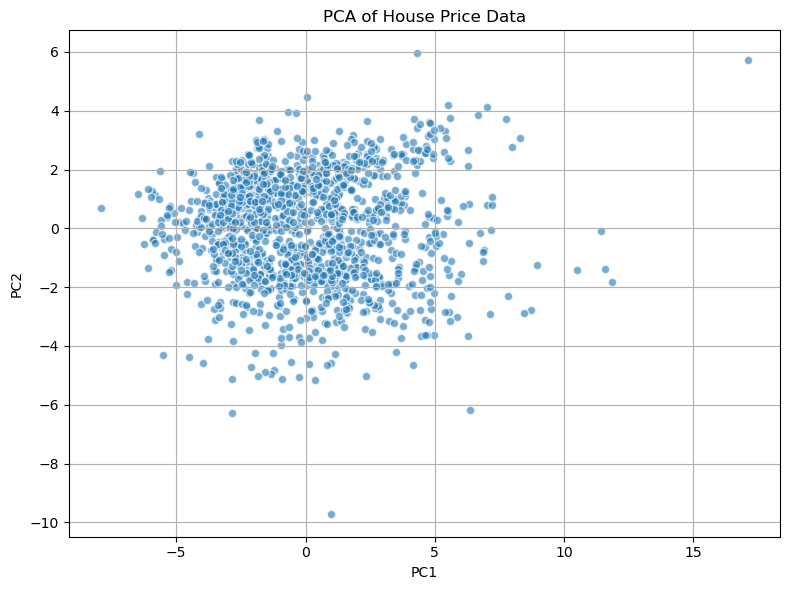

Printing top 5 features contributing to PC1:
        Feature       PC1       PC2
37    SalePrice  0.323500  0.034971
4   OverallQual  0.295275  0.014041
16    GrLivArea  0.294666 -0.240475
26   GarageCars  0.277852  0.076417
27   GarageArea  0.272392  0.111389

Printing top 5 features contributing to PC2:
         Feature       PC1       PC2
9     BsmtFinSF1  0.139161  0.308022
17  BsmtFullBath  0.073619  0.299632
12   TotalBsmtSF  0.251101  0.222527
13      1stFlrSF  0.250653  0.172125
6      YearBuilt  0.216133  0.164348


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Loading dataset and selecting numeric columns
df = pd.read_csv('houseprice.csv')
num_data = df.select_dtypes(include=[np.number]).fillna(0)
features = num_data.columns

# Standardizing features to same scale
scaler = StandardScaler()
scaled = scaler.fit_transform(num_data)

# Calculating covariance matrix and eigenvalues/vectors
cov = np.cov(scaled, rowvar=False)
eig_vals, eig_vecs = np.linalg.eigh(cov)

# Sorting eigenvectors by eigenvalues in descending order
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vecs = eig_vecs[:, sorted_idx]

# Selecting top two principal components
pc1 = eig_vecs[:, 0]
pc2 = eig_vecs[:, 1]
projected = scaled @ np.column_stack((pc1, pc2))

# Creating DataFrame with PCA results
pca_df = pd.DataFrame(projected, columns=['PC1', 'PC2'])

# Plotting data points on first two principal components
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, edgecolors='w')
plt.title('PCA of House Price Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Printing top 5 features contributing most to PC1 and PC2
contrib = pd.DataFrame({'Feature': features, 'PC1': pc1, 'PC2': pc2})

print("Printing top 5 features contributing to PC1:")
print(contrib.reindex(pc1.argsort()[::-1]).head())

print("\nPrinting top 5 features contributing to PC2:")
print(contrib.reindex(pc2.argsort()[::-1]).head())
